# Importing library

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet 

In [92]:
df = pd.read_csv("titanic_train.csv") 

# Data Preprosessing

In [93]:
df.head() # displaying top 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.shape # displaying structure of dataset

(891, 12)

In [95]:
df.info() # displaing description of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
df.isnull().sum(axis=0).sort_values(ascending=False) # counting the null vaue column wise

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [97]:
df = df.drop("Cabin", axis=1) # droping the cabin colum because it contains many missing values

In [98]:
df["Pclass"].unique() # displaying the distinct value of Pclass column

array([3, 1, 2], dtype=int64)

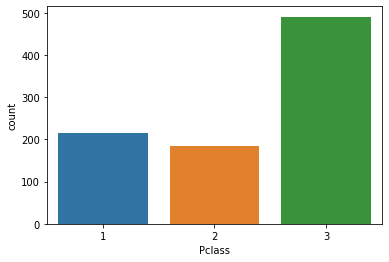

In [99]:
sns.countplot(df["Pclass"]) # ploting the bar-graph of Pclass

In [100]:
df["Pclass"].astype("category").value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [101]:
df["Age"].mean()

29.69911764705882

In [102]:
df["Pclass"] == 1

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

In [103]:
df[df["Pclass"] == 1]["Age"]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

In [104]:
df[df["Pclass"] == 1]["Age"].mean()

38.233440860215055

In [105]:
df[df["Pclass"] == 2]["Age"].mean()

29.87763005780347

In [106]:
df[df["Pclass"] == 3]["Age"].mean()

25.14061971830986

In [107]:
pc1_mean = round(df[df["Pclass"] == 1]["Age"].mean())
pc2_mean = round(df[df["Pclass"] == 2]["Age"].mean())
pc3_mean = round(df[df["Pclass"] == 3]["Age"].mean())

In [108]:
def fill_age(cols):
    age_col  = cols[0]
    pclass_col = cols[1]
    
    if pd.isnull(age_col):
        if pclass_col == 1:
            return pc1_mean
        elif pclass_col == 2:
            return pc2_mean
        else:
            return pc2_mean
        
    else:
        return age_col

In [109]:
df["Age"] = df[["Age", "Pclass"]].apply(fill_age, axis=1)

In [110]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [111]:
df.dropna(inplace=True)

In [112]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

# Exprotory Data Analysis

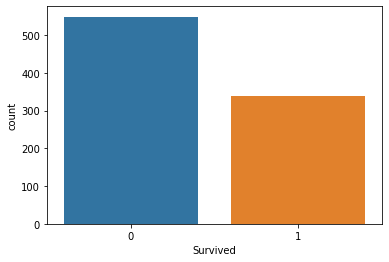

In [113]:
sns.countplot(df["Survived"])

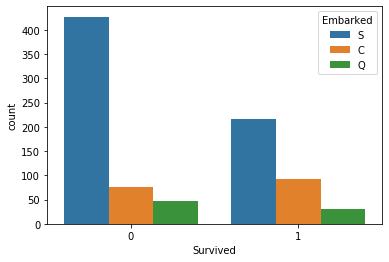

In [114]:
sns.countplot(df["Survived"], hue=df["Embarked"])

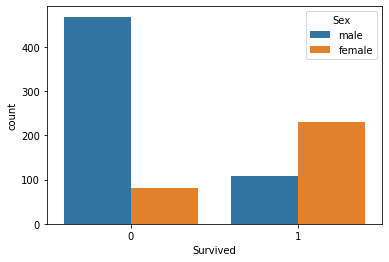

In [115]:
sns.countplot(df["Survived"], hue=df["Sex"])

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [117]:
df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 102.5+ KB


In [120]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [121]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x=="male" else 0)

In [122]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [123]:
pd.get_dummies(df["Embarked"], prefix="Emb", drop_first=True)

,Emb_Q,Emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [124]:
dummies = pd.get_dummies(df["Embarked"], prefix="emb", drop_first=True)

In [125]:
df = pd.concat([df, dummies], axis=1)

In [126]:
df.drop("Embarked", axis=1, inplace=True)

In [127]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,emb_Q,emb_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [128]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [129]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [130]:
dummies = pd.get_dummies(df["Pclass"], prefix="Pcl", drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop("Pclass", axis=1, inplace=True)

In [131]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,emb_Q,emb_S,Pcl_2,Pcl_3
0,0,1,22.0,1,0,7.2500,0,1,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0
4,0,1,35.0,0,0,8.0500,0,1,0,1


# spliting our data set into dependent and independent 

In [132]:
X = df.drop("Survived", axis=1)  
y = df["Survived"]

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
# building traing and tesing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

# Training Model 

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
nb = GaussianNB() # calling our model


In [137]:
nb.fit(X_train, y_train) # traing our model on traing dataset

GaussianNB(priors=None, var_smoothing=1e-09)

# Predicting Future Results

In [138]:
prediction = nb.predict(X_test)  

# Model Evaluation

In [139]:
from sklearn.metrics import confusion_matrix, classification_report

In [140]:
print(confusion_matrix(y_test, prediction)) # Evaluting model using confusion matrix

[[96 11]
 [21 50]]


In [141]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.82      0.70      0.76        71

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



# Data Virtualizition

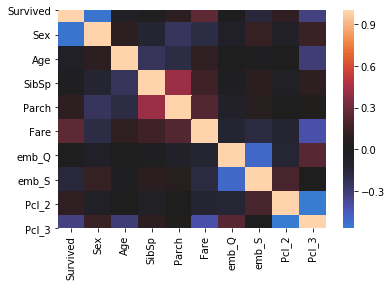

In [142]:
#Heat Map
hm = sns.heatmap(data=df.corr(),center=0) 

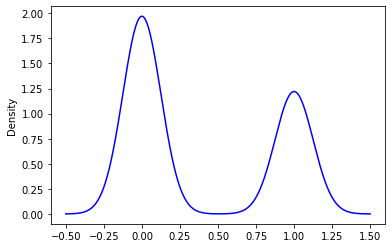

In [143]:
# Density plot
df.Survived.plot.density(color='blue') 

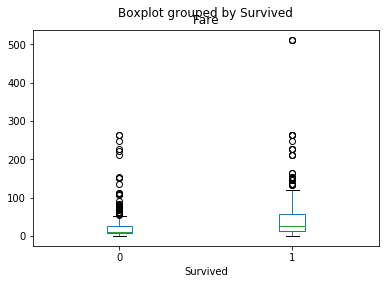

In [144]:
# Box Plot
df.boxplot(by='Survived',column=['Fare'],grid=False) 

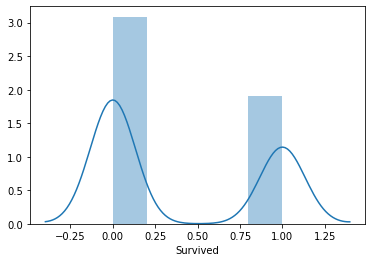

In [145]:
# Dist plot
sns.distplot(df["Survived"]) 

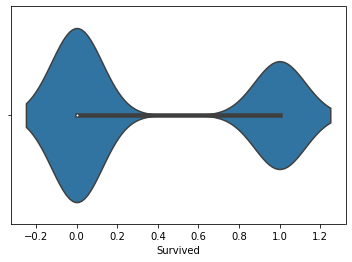

In [146]:
# Violin plot
sns.violinplot(df["Survived"]) 

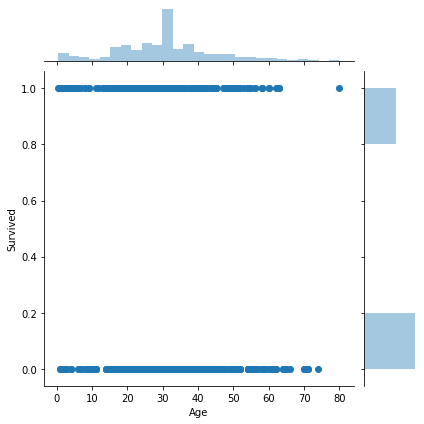

In [147]:
#Joint plot
sns.jointplot(data=df, x="Age", y="Survived") 

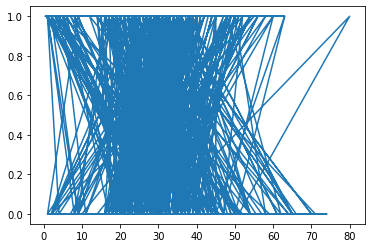

In [148]:
# Line chart
plt.plot(df['Age'],df['Survived'])

<BarContainer object of 889 artists>

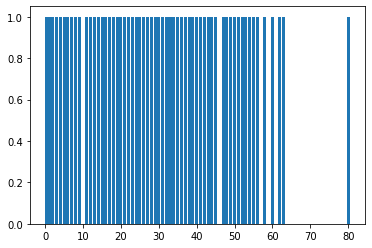

In [149]:
# Bar Chart
plt.bar(df['Age'],df['Survived'])

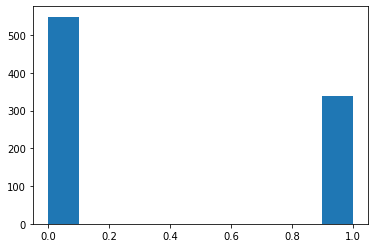

In [150]:
# Histogram chart
plt.hist(df['Survived'])
plt.show() 

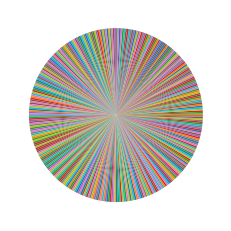

In [151]:
# Pie Chart
plt.pie(df['Survived'])
plt.show() 